<CENTER>
    <font size="5"> <b>Computer Vision 2023 Assignment 1: Image filtering </b></font><br>
    <font size="3"> TC University of Adelaide </font> <br>
    <span style="color:blue"> kevin.ferreira@student.adelaide.edu.au </span>
</CENTER><br>

The purpose of this assignment is to get familiar with image filtering after understanding how it is stored and processed in memory.
We will apply basic filters to a number of images and then apply convolutional image filters.
The goal will be to use these filters, to understand how they work and how they can be useful.

<CENTER>
    <font size="5"> <b> Reminder of instructions </b></font> 
</CENTER> 

In this prac you will research, implement and test some image filtering operations. Image filtering by convolution is a fundamental step in many computer vision tasks and you will find it useful to have a firm grasp of how it works. For example, later in the course we will come across Convolutional Neural Networks (CNNs) which are built from convolutional image filters.

The main aims of the prac are:

- to understand the basics of how images are stored and processed in memory;
- to gain exposure to several common image filters, and understand how they work;
- to get practical experience implementing convolutional image filters;
- to test your intuition about image filtering by running some experiments;
- to report your results in a clear and concise manner.

*This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, HCI and programming.*

<span style="color:red"><b>General instructions</b></span>


Follow the instructions in this Python notebook and the accompanying file *a1code.py* to answer each question. It's your responsibility to make sure your answer to each question is clearly labelled and easy to understand. Note that most questions require some combination of Python code, graphical output, and text analysing or describing your results. Although we will check your code as needed, marks will be assigned based on the quality of your write up rather than for code correctness! This is not a programming test - we are more interested in your understanding of the topic.

Only a small amount of code is required to answer each question. We will make extensive use of the Python libraries

- [numpy](numpy.org) for mathematical functions
- [skimage](https://scikit-image.org) for image loading and processing
- [matplotlib](https://matplotlib.org/stable/index.html) for displaying graphical results
- [jupyter](https://jupyter.org) for Jupyter Notebooks

You should get familiar with the documentation for these libraries so that you can use them effectively.

<CENTER>
    <font size="5"> <b> Import of libraries </b></font> 
</CENTER> 
In this section we import all the libraries we will need including the code file containing all the useful functions. 

In [1]:
# Numpy is the main package for scientific computing with Python. 
import numpy as np

#from skimage import io

# Imports all the methods we define in the file a1code.py
from a1code import *

# Matplotlib is a useful plotting library for python 
import matplotlib.pyplot as plt
# This code is to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

<CENTER>
    <font size="5"> <b> Task 0: Numpy warm up! (5%) </b></font> 
</CENTER> 

1. Create a 1D numpy array Z with 12 elements. Fill with values 1 to 12.

In [2]:
Z = np.array([i for i in range(1,13)])
# Z = np.arange(12)+1
print("Z =", Z)

Z = [ 1  2  3  4  5  6  7  8  9 10 11 12]


2. Reshape Z into a 2D numpy array A with 3 rows and 4 columns.

In [3]:
A = np.reshape(Z, (3, 4))
print("A =", A)

A = [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


3. Reshape Z into a 2D numpy array B with 4 rows and 3 columns.

In [4]:
B = np.reshape(Z, (4, 3))
print("B =", B)

B = [[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


4. Calculate the *matrix* product of A and B.

In [5]:
matrix_product = np.dot(A,B)
print("matrix_product =", matrix_product)

matrix_product = [[ 70  80  90]
 [158 184 210]
 [246 288 330]]


5. Calculate the *element wise* product of $A$ and $B^T$ (B transpose).

In [6]:
element_wise_product = A*np.transpose(B)
print("element_wise_product =", element_wise_product)

element_wise_product = [[  1   8  21  40]
 [ 10  30  56  88]
 [ 27  60  99 144]]


<CENTER>
    <font size="5"> <b> Task 1: Loading and displaying an image (10%) </b></font> 
</CENTER> 

Below is a function to display an image using the pyplot module in matplotlib. Implement the `load()` and `print_stats()` functions in a1code.py so that the following code loads the mandrill image, displays it and prints its height, width and channel. 

In [7]:
def display(img, caption=''):
    # Show image using pyplot 
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.title(caption)
    plt.axis('off')
    plt.show()

<font size="5"> <b> Whipbird</b></font> 

The photo proposed by the subject (below) will allow us to apply the filters that we will create later. Indeed, it is composed of many details and also many combinations of colors. This will explain the influence of each channel of each RGB color in a photo.

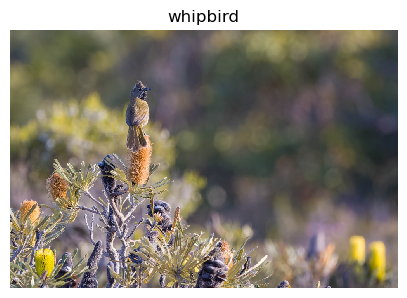

Height: 667
Width: 1000
Channel: 3


In [8]:
image1 = load('images/whipbird.jpg')  
display(image1, 'whipbird')
print_stats(image1)

Let's try to apply simple point processing first on all channels and then on each channel separately.

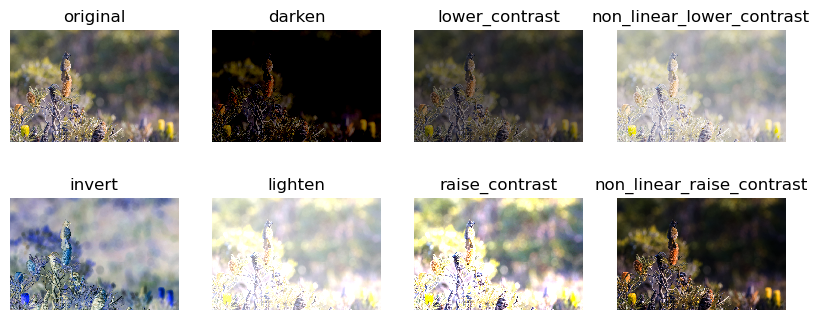

In [9]:
simple_point_processing(image1)

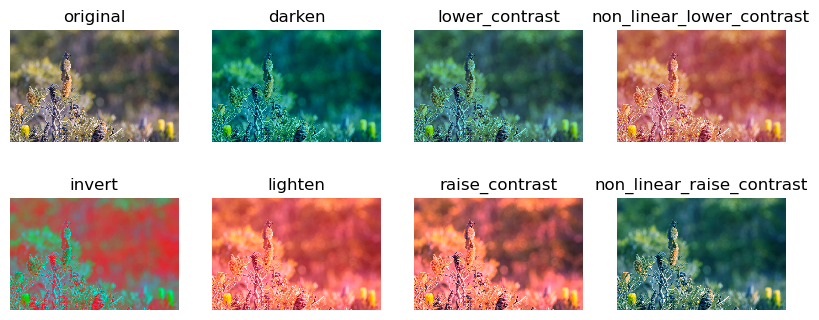

In [10]:
simple_point_processing_one_channel(image1, 0)

<font size="5"> <b> Dancing spider</b></font> 

The picture of the dancing spider is ideal for checking our filters since it is very colorful and with a lot of detail. On the other hand, the contrast between the background and the spider makes it possible to verify that certain filters, like the Sobel filter, detect the contours of the animal.

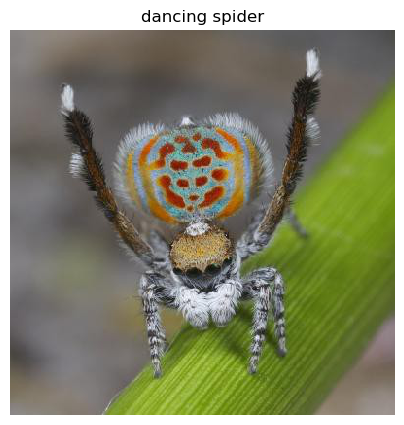

Height: 396
Width: 396
Channel: 3


In [11]:
image2 = load('images/dancing-spider.jpg')
display(image2, 'dancing spider')
print_stats(image2)

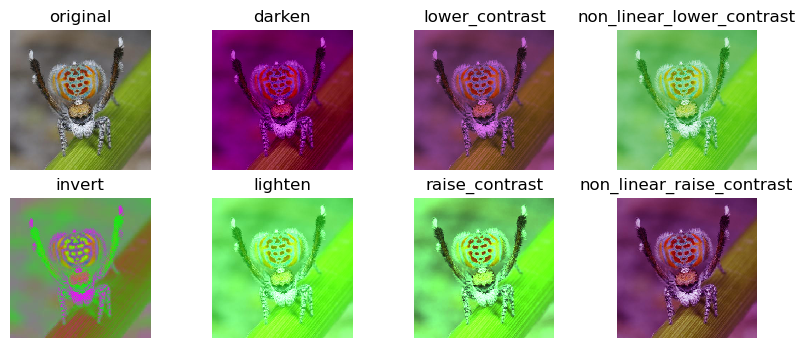

In [12]:
simple_point_processing_one_channel(image2, 1)

<font size="5"> <b> La Joconde</b></font> 

The greyscale photo of the Mona Lisa will be useful to test our algorithms on an image with only one channel. On the other hand, it is made of many details and therefore many edges.

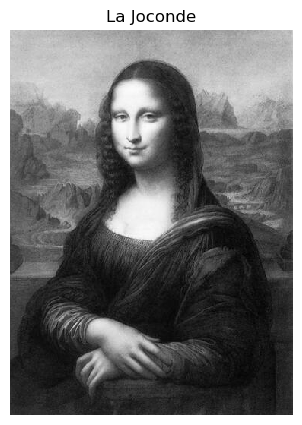

Height: 507
Width: 372
Channel: 1


In [13]:
image3 = load('images/La_Joconde.png')
display(image3, 'La Joconde')
print_stats(image3)

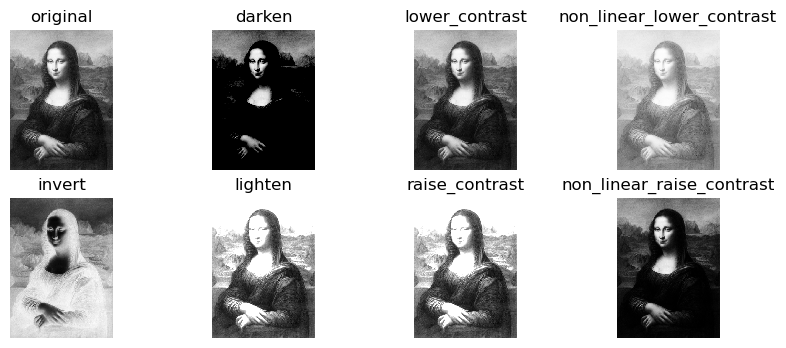

In [14]:
simple_point_processing(image3)

<font size="5"> <b> Conclusion task 1</b></font>  
This part allowed to implement a program of reading and display of image.
We have tested some simple point processing to understand how the filtering works and the problems that may occur.

First of all, an RGB image is an image composed of three color channels: red, green and blue. Each channel of a pixel indicates the intensity of each RGB color which combined form a color. These intensities are given as integers from 0 to 255 or as floats from 0 to 1.

Thus, we can see that when we decrease the brightness of the red color, the colors become more green and blue. On the other hand, by increasing it, it becomes red. However, if we change the contribution of each color in the same way, the colors are unchanged and become darker, lighter, more contrasted ...

When a processed pixel value becomes less than 0 or greater than 255, it is usually clipped to be in the range of valid pixel values. This means that any value below 0 is set to 0, and any value above 255 (or 1) is set to 255 (or 1).

The effect of pixel value saturation can vary depending on the image processing task and the algorithm used. In some cases, it may not have a significant impact on the output image. 
However, if for example we need to detect edges, saturation of the values may result in the loss of important information and details in the image.

<CENTER>
    <font size="5"> <b> Task 2: Image processing (25%) </b></font> 
</CENTER> 
Now that you have an image stored as a numpy array, let's try some operations on it.

1. Implement the `crop()` function in a1code.py. Use array slicing to crop the image.
2. Implement the `resize()` function in a1code.py.
3. Implement the `change_contrast()` function in a1code.py.
4. Implement the `greyscale()` function in a1code.py.
5. Implement the `binary()` function in a1code.py.

What do you observe when you change the threshold of the binary function?

Apply all these functions with different parameters on your own test images.

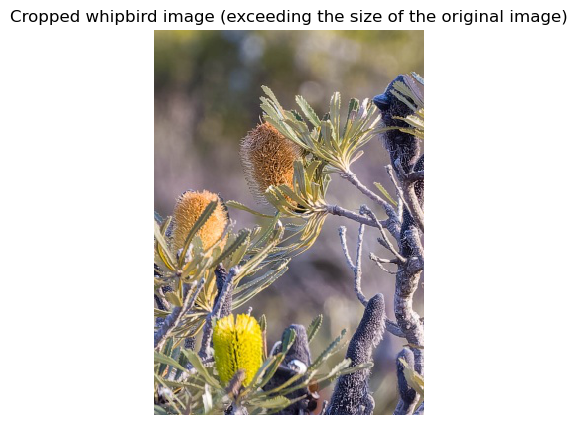

Height: 389
Width: 272
Channel: 3


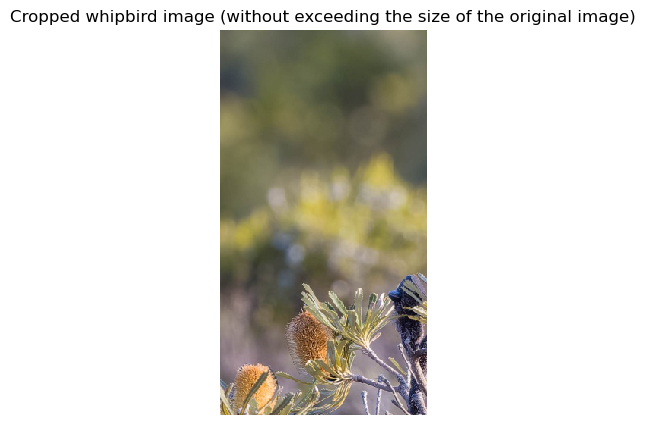

Height: 508
Width: 272
Channel: 3


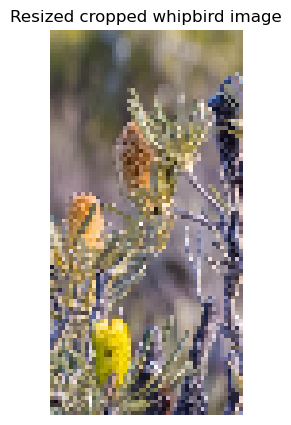

Height: 100
Width: 50
Channel: 3


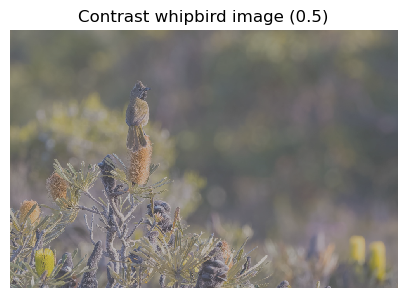

Height: 667
Width: 1000
Channel: 3


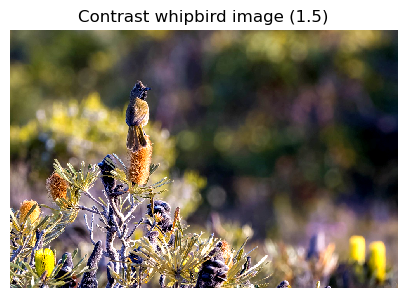

Height: 667
Width: 1000
Channel: 3


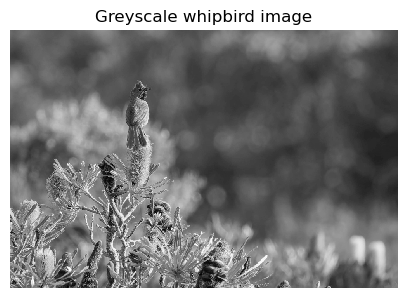

Height: 667
Width: 1000
Channel: 1


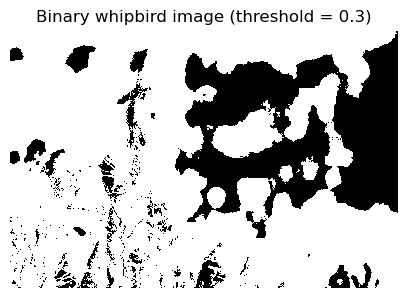

Height: 667
Width: 1000
Channel: 1


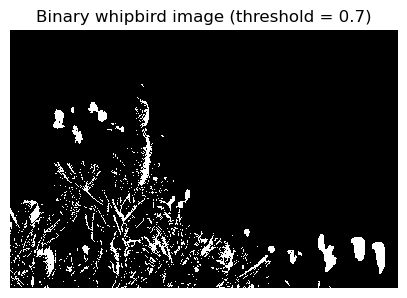

Height: 667
Width: 1000
Channel: 1


In [15]:
crop_img = crop(image1, 278, 5, 508, 272)
display(crop_img, "Cropped whipbird image (exceeding the size of the original image)") 
print_stats(crop_img)

crop_img2 = crop(image1, 0, 5, 508, 272)
display(crop_img2, "Cropped whipbird image (without exceeding the size of the original image)") 
print_stats(crop_img2)

resize_img = resize(crop_img, 100, 50 )
display(resize_img, "Resized cropped whipbird image")
print_stats(resize_img)

contrast_img = change_contrast(image1, 0.5)
display(contrast_img, "Contrast whipbird image (0.5)")
print_stats(contrast_img)

contrast_img = change_contrast(image1, 1.5)
display(contrast_img, "Contrast whipbird image (1.5)")
print_stats(contrast_img)

grey_img = greyscale(image1)
display(grey_img, "Greyscale whipbird image")
print_stats(grey_img)

binary_img = binary(grey_img, 0.3)
display(binary_img, "Binary whipbird image (threshold = 0.3)")
print_stats(binary_img)

binary_img = binary(grey_img, 0.7)
display(binary_img, "Binary whipbird image (threshold = 0.7)")
print_stats(binary_img)

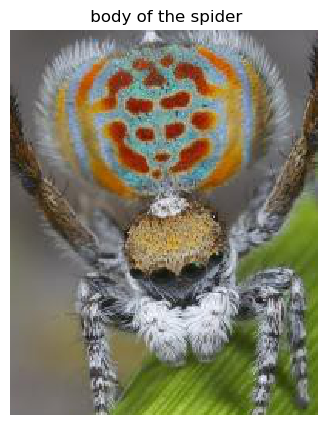

Height: 250
Width: 200
Channel: 3


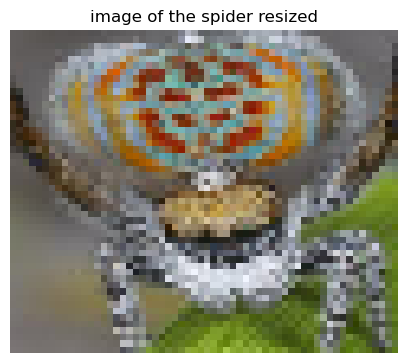

Height: 50
Width: 60
Channel: 3


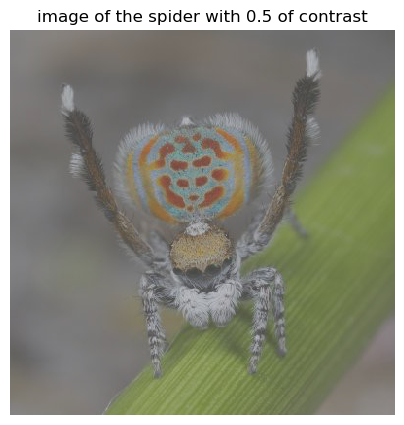

Height: 396
Width: 396
Channel: 3


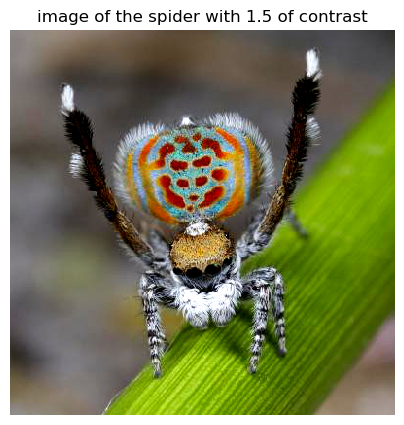

Height: 396
Width: 396
Channel: 3


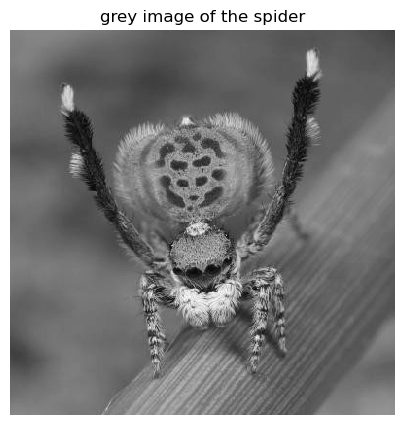

Height: 396
Width: 396
Channel: 1


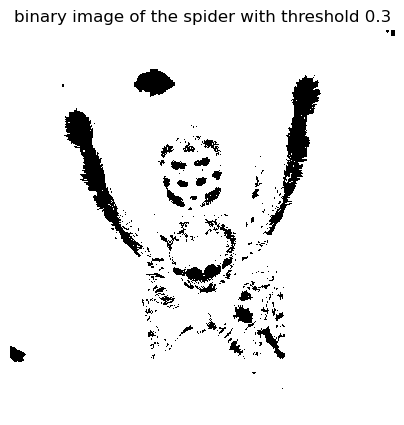

Height: 396
Width: 396
Channel: 1


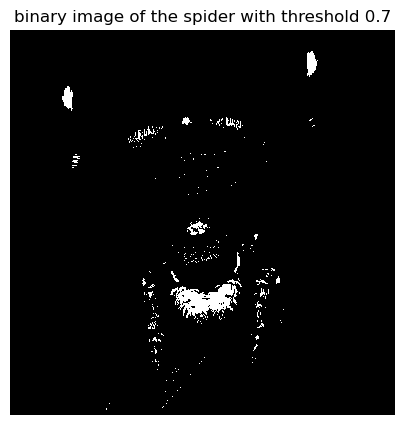

Height: 396
Width: 396
Channel: 1


In [16]:
crop_img2 = crop(image2, 90, 90, 250, 200)
display(crop_img2, " body of the spider") 
print_stats(crop_img2)

resize_img2 = resize(crop_img2, 50, 60 )
display(resize_img2, "image of the spider resized")
print_stats(resize_img2)

contrast_img2 = change_contrast(image2, 0.5)
display(contrast_img2, "image of the spider with 0.5 of contrast")
print_stats(contrast_img2)

contrast_img2 = change_contrast(image2, 1.5)
display(contrast_img2, "image of the spider with 1.5 of contrast")
print_stats(contrast_img2)

grey_img2 = greyscale(image2)
display(grey_img2, "grey image of the spider")
print_stats(grey_img2)

binary_img2 = binary(grey_img2, 0.3)
display(binary_img2, "binary image of the spider with threshold 0.3")
print_stats(binary_img2)

binary_img2 = binary(grey_img2, 0.7)
display(binary_img2, "binary image of the spider with threshold 0.7")
print_stats(binary_img2)

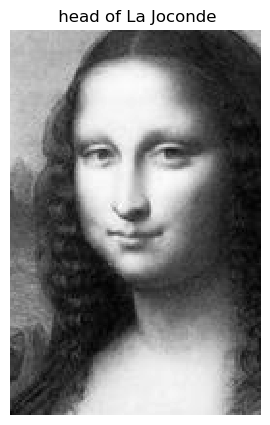

Height: 200
Width: 130
Channel: 1


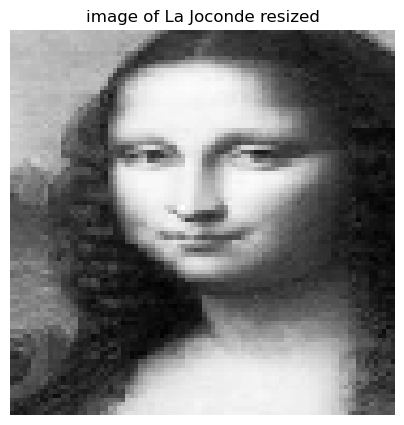

Height: 90
Width: 90
Channel: 1


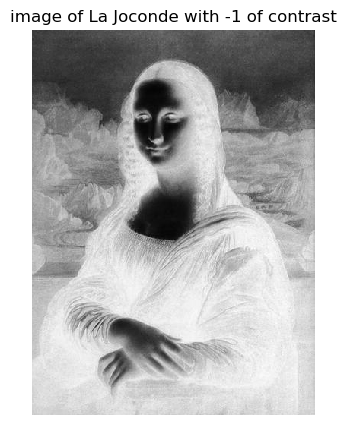

Height: 507
Width: 372
Channel: 1


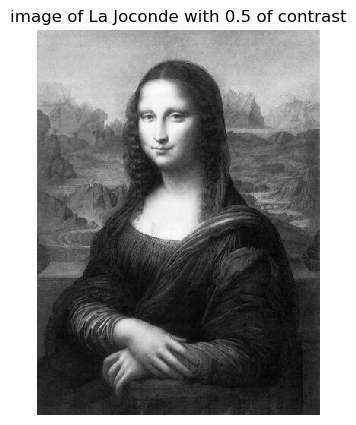

Height: 507
Width: 372
Channel: 1


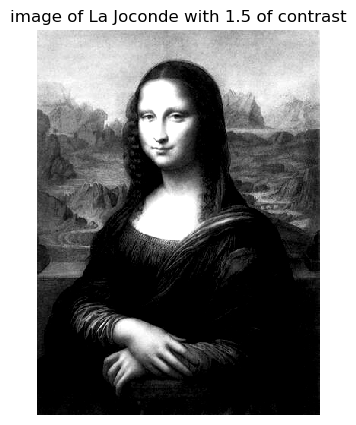

Height: 507
Width: 372
Channel: 1


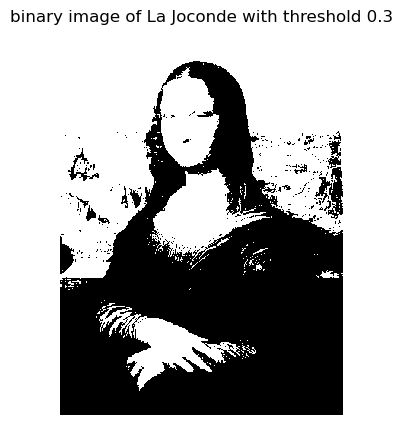

Height: 507
Width: 372
Channel: 1


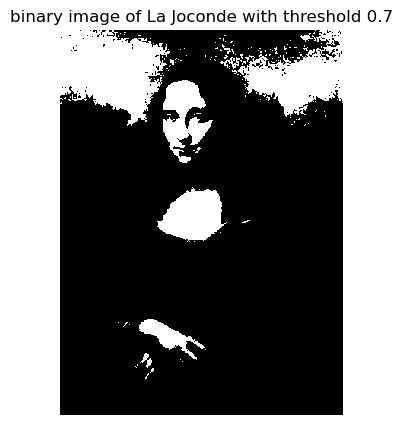

Height: 507
Width: 372
Channel: 1


In [17]:
crop_img3 = crop(image3, 50, 100, 200, 130)
display(crop_img3, " head of La Joconde") 
print_stats(crop_img3)

resize_img3 = resize(crop_img3, 90, 90 )
display(resize_img3, "image of La Joconde resized")
print_stats(resize_img3)

contrast_img3 = change_contrast(image3, -1)
display(contrast_img3, "image of La Joconde with -1 of contrast")
print_stats(contrast_img3)

contrast_img3 = change_contrast(image3, 0.5)
display(contrast_img3, "image of La Joconde with 0.5 of contrast")
print_stats(contrast_img3)

contrast_img3 = change_contrast(image3, 1.5)
display(contrast_img3, "image of La Joconde with 1.5 of contrast")
print_stats(contrast_img3)

binary_img3 = binary(image3, 0.3)
display(binary_img3, "binary image of La Joconde with threshold 0.3")
print_stats(binary_img3)

binary_img3 = binary(image3, 0.7)
display(binary_img3, "binary image of La Joconde with threshold 0.7")
print_stats(binary_img3)

<font size="5"> <b> Conclusion task 2</b></font> 

The crop function allows you to crop the photo by indicating the starting pixel and the desired final image size. However, you have to be careful with the limits of the image. Indeed, if our starting image is 10 pixels by 10 pixels, starting to crop at the pixel (4,7), the final image will be maximum 6 pixels by 3 pixels. Therefore, if the limits of are not respected, the program returns an error and the maximum image from the starting pixel.

The function change contrast modifies the contrast by multiplying each channel of the pixel by a factor. However, if the factor is not between -1 and 1, we can face saturation situations as seen in task 1. 

The resize function allows to resize the image. 

The grey scale function transforms a color image into a grayscale image using the formula used by Luma coding, i.e. taking into account the luminance of each color.

Finally, the binary function transforms each pixel in gray level into 0 or 1 according to a threshold. Depending on the threshold, we observe different effects on the resulting binary image. A lower threshold value will result in more pixels being set to 1 in the binary image, while a higher threshold value will result in more pixels being set to 0. As a result, the level of detail and contrast in the binary image is degraded. Therefore, if the threshold value is too low, the binary image may contain unwanted noise or artifacts, while if the threshold value is too high, important details of the image may be lost. Therefore, it is important to choose an appropriate threshold value for the specific image and application.

<CENTER>
    <font size="5"> <b> Task 3: Convolution (25%) </b></font> 
</CENTER> 

<font size="5"> <b> 3.1 2D convolution </b></font> 

Using the definition of 2D convolution from week 1, implement the convolution operation in the function `conv2D()` in a1code.py.


In [18]:
test_conv2D()

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 0. 0.]
 [0. 0. 2. 2. 3. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 0. 0.]
 [0. 0. 1. 1. 2. 1. 1. 0. 0.]
 [0. 0. 2. 2. 3. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


<font size="5"> <b> 3.2 RGB convolution </b></font> 

In the function `conv` in a1code.py, extend your function `conv2D` to work on RGB images, by applying the 2D convolution to each channel independently. 

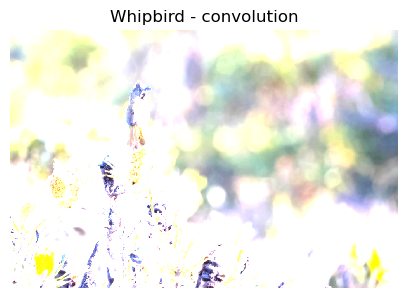

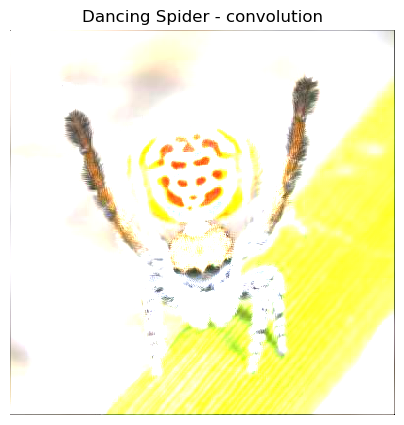

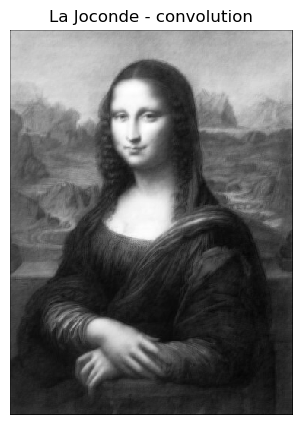

In [19]:
# Test
kernel = np.array([[1,0,1], [0,0,0],[1,0,0]])

image1_conv = conv(image1, kernel)
display(image1_conv, "Whipbird - convolution")

image2_conv = conv(image2, kernel)
display(image2_conv, "Dancing Spider - convolution")

image3_conv = conv(image3, kernel)
display(image3_conv, "La Joconde - convolution")

<font size="5"> <b> 3.3 Gaussin filter convolution </b></font> 

Use the `gauss2D` function provided in a1code.py to create a Gaussian kernel, and apply it to your images with convolution. You will obtain marks for trying different tests and analysing the results, for example:

- try varying the image size, and the size and variance of the filter  
- subtract the filtered image from the original - this gives you an idea of what information is lost when filtering

What do you observe and why?

<font size="4"> <b> Influence of the variance of the filter </b></font>

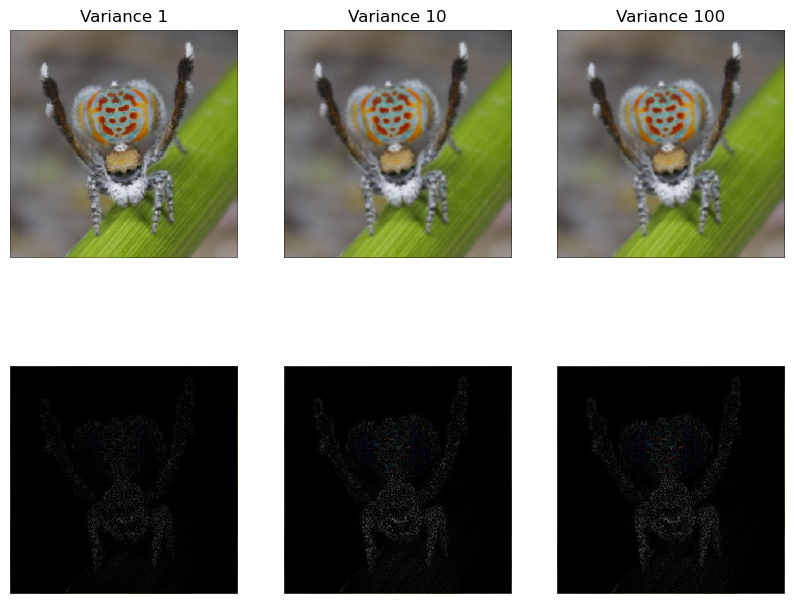

In [20]:
image_to_conv = image2
kernels = [gauss2D(5, 1), gauss2D(5, 10), gauss2D(5, 100)]

images_conv = [conv(image_to_conv, kernels[0]), 
               conv(image_to_conv, kernels[1]), 
               conv(image_to_conv, kernels[2])]

images_sub = [abs(image_to_conv - images_conv[0]), 
              abs(image_to_conv - images_conv[1]),
              abs(image_to_conv - images_conv[2])]

f, axarr = plt.subplots(2,3)
axarr[0,0].set_title("Variance 1")
axarr[0,1].set_title("Variance 10")
axarr[0,2].set_title("Variance 100")
for i in range(3):
    axarr[0,i].imshow(images_conv[i])
    axarr[1,i].imshow(images_sub[i])
    axarr[0,i].axis('off')
    axarr[1,i].axis('off')

In this sub-section, we are interested in the influence of the filter variance. The variance is a parameter that controls the width of the Gaussian function used for the filter. We see that the larger the variance, the smoother the image.
If on the contrary the variance is low, we keep more details. It is therefore important to choose the variance according to the objective of the filtering.

<font size="4"> <b> Influence of the size of the filter </b></font>

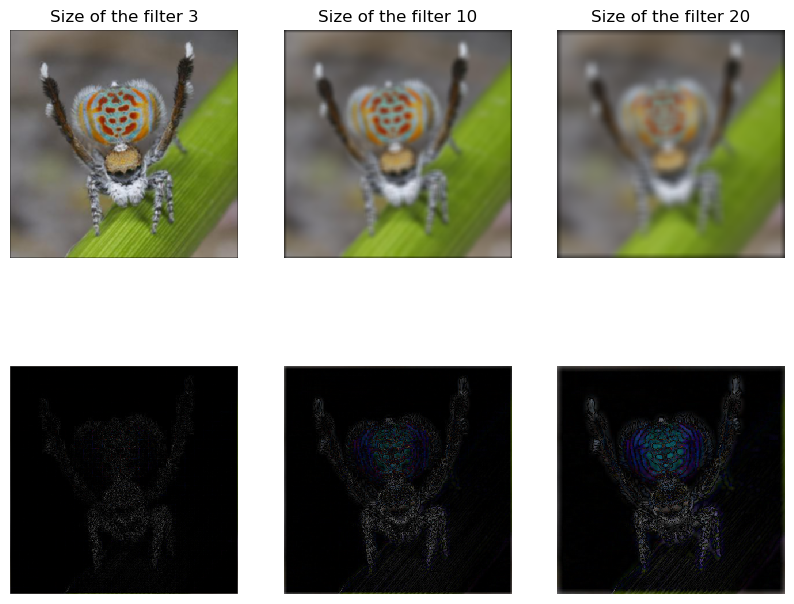

In [21]:
image_to_conv = image2
kernels = [gauss2D(3, 10), gauss2D(10, 10), gauss2D(20, 10)]

images_conv = [conv(image_to_conv, kernels[0]), 
               conv(image_to_conv, kernels[1]), 
               conv(image_to_conv, kernels[2])]

images_sub = [abs(image_to_conv - images_conv[0]), 
              abs(image_to_conv - images_conv[1]),
              abs(image_to_conv - images_conv[2])]

f, axarr = plt.subplots(2,3)
axarr[0,0].set_title("Size of the filter 3")
axarr[0,1].set_title("Size of the filter 10")
axarr[0,2].set_title("Size of the filter 20")
for i in range(3):
    axarr[0,i].imshow(images_conv[i])
    axarr[1,i].imshow(images_sub[i])
    axarr[0,i].axis('off')
    axarr[1,i].axis('off')

In this sub-section, we are interested in the influence of the filter size. The larger the filter size, the more important the smoothing is. However, a filter size that is too large can lead to a loss of important details in the image. Moreover, the filter should not be larger than the image.

<font size="4"> <b> Influence of the size of the image </b></font>

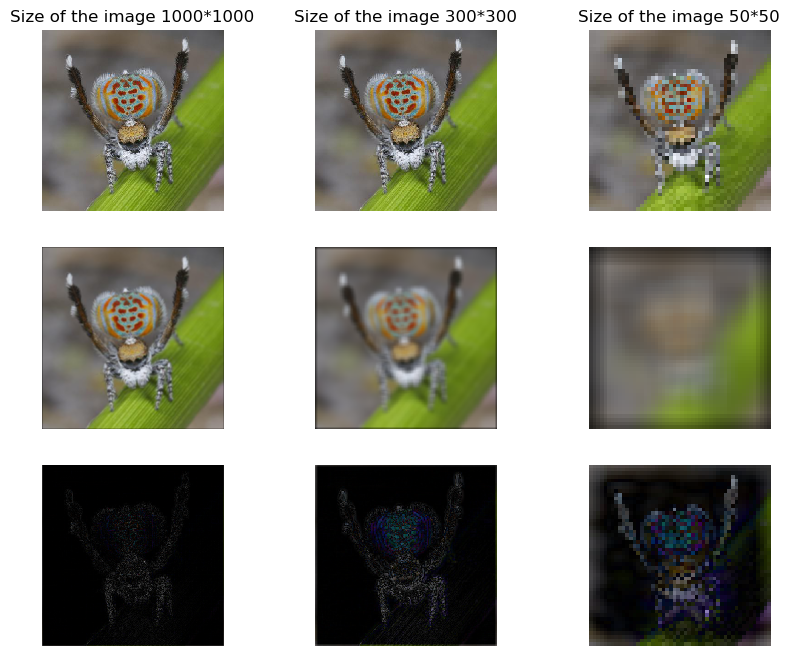

In [22]:
image_to_conv  = image2
images_to_conv = [resize(image_to_conv, 1000, 1000),
                  resize(image_to_conv,  300,  300),
                  resize(image_to_conv,   50,   50)]
kernel = gauss2D(10, 10)

images_conv = [conv(images_to_conv[0], kernel), 
               conv(images_to_conv[1], kernel), 
               conv(images_to_conv[2], kernel)]

images_sub = [abs(images_to_conv[0] - images_conv[0]), 
              abs(images_to_conv[1] - images_conv[1]),
              abs(images_to_conv[2] - images_conv[2])]

f, axarr = plt.subplots(3,3)
axarr[0,0].set_title("Size of the image 1000*1000")
axarr[0,1].set_title("Size of the image 300*300")
axarr[0,2].set_title("Size of the image 50*50")
for i in range(3):
    axarr[0,i].imshow(images_to_conv[i])
    axarr[1,i].imshow(images_conv[i])
    axarr[2,i].imshow(images_sub[i])
    axarr[0,i].axis('off')
    axarr[1,i].axis('off')
    axarr[2,i].axis('off')

In this sub-section, we are interested in the influence of the image size. For a given image, it is important to choose a filter size that is adapted to the image resolution. If the filter is too small, it will not have a significant effect on the image, while a filter that is too large may result in a loss of detail.

**In conclusion, the choice of filter size, variance and image size depends on the purpose of the filtering operation.** 

### 3.4 Sobel filters

Define a horizontal and vertical Sobel edge filter kernel and test them on your images. You will obtain marks for testing them and displaying results in interesting ways, for example:

- apply them to an image at different scales
- considering how to display positive and negative gradients
- apply different combinations of horizontal and vertical filters

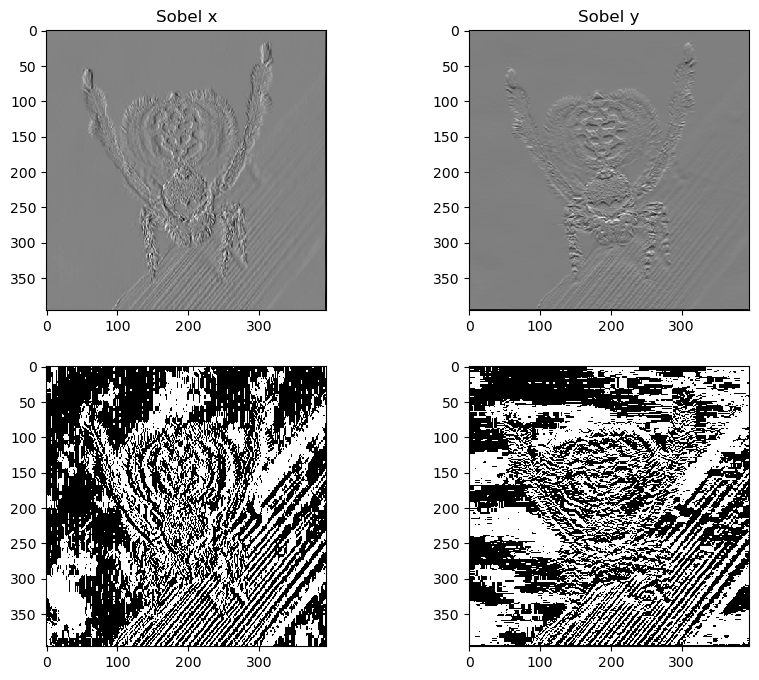

In [23]:
sobel_x = np.array([[1,0,-1],[2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1,2,1],[0, 0, 0], [-1, -2, -1]])

image_to_filter  = greyscale(image2)

image_sobel_x = conv(image_to_filter, sobel_x)
image_sobel_x_grad = binary(image_sobel_x, 0)

image_sobel_y = conv(image_to_filter, sobel_y)
image_sobel_y_grad = binary(image_sobel_y, 0)

f, axarr = plt.subplots(2,2)
axarr[0,0].set_title("Sobel x")
axarr[0,1].set_title("Sobel y")
axarr[0,0].imshow(image_sobel_x)
axarr[1,0].imshow(image_sobel_x_grad)
axarr[0,1].imshow(image_sobel_y)
axarr[1,1].imshow(image_sobel_y_grad)

Sobel filters are used to detect horizontal and vertical edges in an image.
The Sobel X filter calculates the difference in brightness between the pixels to the left and right of each pixel in the image. It therefore accentuates horizontal transitions between adjacent pixels.
The Sobel Y filter, on the other hand, calculates the difference in brightness between the neighboring pixels above and below each pixel in the image. It therefore accentuates the vertical transitions between adjacent pixels.

Therefore, the Sobel X filter is used to detect horizontal edges in an image, while the Sobel Y filter is used to detect vertical edges. By combining the two filters, we can detect edges in all directions.

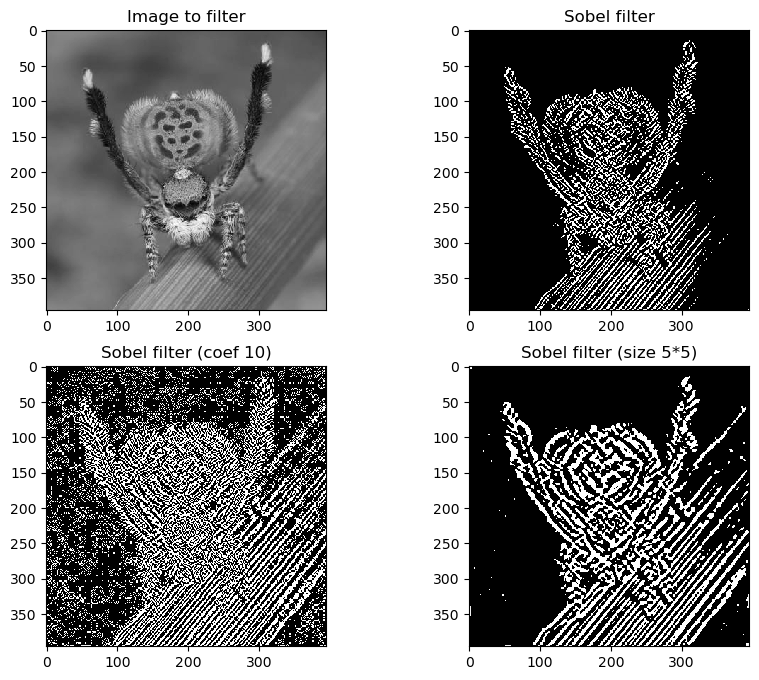

In [24]:
sobel_x1 = np.array([[1, 0, -1],
                    [2, 0, -2], 
                    [1, 0, -1]])
sobel_y1 = np.array([[ 1, 2, 1],
                    [ 0, 0, 0], 
                    [-1,-2,-1]])

sobel_x2 = np.array([[1,  0, -1],
                     [10, 0,-10], 
                     [1,  0, -1]])
sobel_y2 = np.array([[1,  10, 1],
                     [0,   0, 0], 
                     [-1,-10,-1]])


sobel_x3 = np.array([[1, 0, 0, 0, -1],
                     [1, 0, 0, 0, -1],
                     [2, 0, 0, 0, -2], 
                     [1, 0, 0, 0, -1],
                     [1, 0, 0, 0, -1]])
sobel_y3 = np.array([[ 1, 1, 2, 1, 1],
                     [ 0, 0, 0, 0, 0],
                     [ 0, 0, 0, 0, 0],
                     [ 0, 0, 0, 0, 0],
                     [-1,-1,-2,-1,-1]])

image_to_filter  = greyscale(image2)

image_sobel_x = conv(image_to_filter, sobel_x1)
image_sobel_y = conv(image_sobel_x, sobel_y1)
image_sobel_1 = binary(image_sobel_y, 0.3)

image_sobel_x = conv(image_to_filter, sobel_x2)
image_sobel_y = conv(image_sobel_x, sobel_y2)
image_sobel_2 = binary(image_sobel_y, 0.3)

image_sobel_x = conv(image_to_filter, sobel_x3)
image_sobel_y = conv(image_sobel_x, sobel_y3)
image_sobel_3 = binary(image_sobel_y, 0.3)

f, axarr = plt.subplots(2,2)
axarr[0,0].set_title("Image to filter")
axarr[0,0].imshow(image_to_filter)
axarr[0,1].set_title("Sobel filter")
axarr[0,1].imshow(image_sobel_1)
axarr[1,0].set_title("Sobel filter (coef 10)")
axarr[1,0].imshow(image_sobel_2)
axarr[1,1].set_title("Sobel filter (size 5*5)")
axarr[1,1].imshow(image_sobel_3)

<font size="5"> <b> Conclusion task 3</b></font> 

The Sobel filter is a common edge detection filter that uses two filters: one horizontal and one vertical. The horizontal Sobel filter detects changes in pixel intensity in the horizontal direction, while the vertical Sobel filter detects changes in the vertical direction.By combining the two kernels we can detect edges in both directions.

The key parameters of the Sobel filter are its size and coefficients.

The larger the filter size, the larger the analysis area and therefore the larger the filter effect. However, a filter size that is too large can result in a loss of important details in the image. 

Moreover, the kernel coefficients are predefined in the Sobel filter matrices for horizontal and vertical edge detection. However, by customizing the coefficients one can detect new contours.

<center>
    <font size="5"> <b> Task 4: Image sampling and pyramids (35%)</b></font>
</center>

<font size="3"> <b>  4.1 Image Sampling </b></font>

Apply your `resize()` function to reduce an image (I) to 0.5 height and width

Repeat the above procedure, but apply a Gaussian blur filter to your original image before downsampling it. How does the result compare to your previous output, and to the original image? Why?


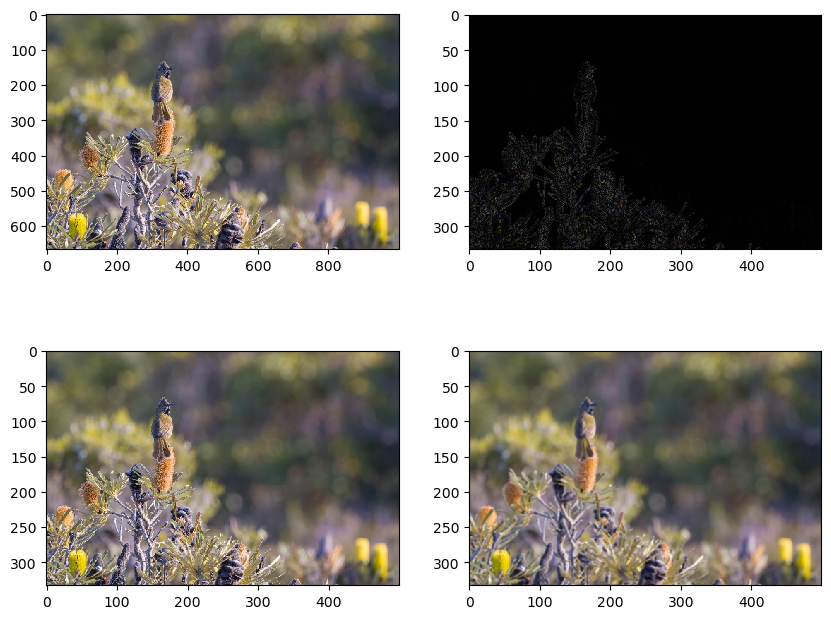

In [25]:
image_to_sample = image1
image_resized = resize(image_to_sample, int(image_to_sample.shape[0]/2), int(image_to_sample.shape[1]/2))

images_conv_resized = resize(conv(image_to_sample, gauss2D(5, 10)), 
                             int(image_to_sample.shape[0]/2), int(image_to_sample.shape[1]/2))

f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(image_to_sample)
axarr[0,1].imshow(abs(image_resized - images_conv_resized))
axarr[1,0].imshow(image_resized )
axarr[1,1].imshow(images_conv_resized)

<font size="3"> <b>  4.2 Image Pyramids </b></font>

Creat a Gaussian pyramid as described in week2's lecture on an image.

Apply a Gaussian kernel to an image I, and resize it with ratio 0.5, to get $I_1$. Repeat this step to get $I_2$, $I_3$ and $I_4$.

Display these four images in a manner analogus to the example shown in the lectures.

(-0.5, 61.5, 40.5, -0.5)

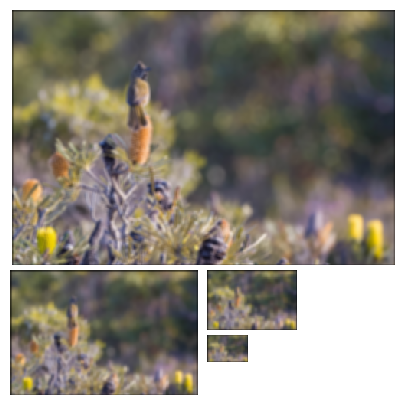

In [26]:
I = image1
gauss = gauss2D(10, 10)
I1 = resize(conv( I, gauss), int( I.shape[0]/2), int(I.shape[1]/2))
I2 = resize(conv(I1, gauss), int(I1.shape[0]/2), int(I1.shape[1]/2))
I3 = resize(conv(I2, gauss), int(I2.shape[0]/2), int(I2.shape[1]/2))
I4 = resize(conv(I3, gauss), int(I3.shape[0]/2), int(I3.shape[1]/2))

gridsize = (12, 8)
fig = plt.figure(figsize=(5, 5))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=8, rowspan=8)
ax2 = plt.subplot2grid(gridsize, (8, 0), colspan=4, rowspan=4)
ax3 = plt.subplot2grid(gridsize, (8, 4), colspan=2, rowspan=2)
ax4 = plt.subplot2grid(gridsize, (10,4))
    
ax1.imshow(I1)
ax1.axis('off')
ax2.imshow(I2)
ax2.axis('off')
ax3.imshow(I3)
ax3.axis('off')
ax4.imshow(I4)
ax4.axis('off')

<font size="5"> <b> Conclusion task 4</b></font> 

The result of downsampling the gaussian blurred image is smoother than the result of downsampling the image without applying a gaussian blur filter. Indeed, the original image may have noise and very large gradients that have been exaggerated by the downsampling process, whereas the gaussian blurred image will have reduced these artifacts (noise, gradient...). However, the gaussian blurred image may also have lost some detail or clarity due to the gaussien blurring filter.

To conclude, Gaussian pyramids involve creating a sequence of images of different sizes by applying a Gaussian filter and downsampling the original image. The Gaussian filter is used to blur the original image, reducing noise and smoothing edges.  Smaller images are then blurred, while larger images are sharper.

<center>
    <font size="5"> <b> Task 5: Auto correlation</b></font>
</center>

Recall from week 2 that cross-correlation is a measure of similarity between a template and an image. It is defined similarly to convolution.

### 5.1 Correlation function

Implement the function `corr()` in a1code.py, based on your convolution function. Hint: numpy's `flip()` function may be useful here.

### 5.2 Auto-correlation

We will experiment with *auto-correlation*, where the template patch is taken from the image it is being compared to. Use a crop from your image as your template. Calculate the correlation of that template with every location in the image, and display the output as an image. Where is the maximum similarity? (Hint: numpy functions `argmax()` and `unravel()` will be useful here). For simplicity, you can use a greyscale version of the image and template.

Try this on an image with some symmetry, such as a person's face and crop the eye.




In [27]:
# Imports all the methods we define in the file a1code.py
from a1code import *

In [28]:
# Display the maximum of correlation in the image of origine
def display_corr(image, crop_img, image_corr, alpha):
    image_chanel = 1
    if (len(image.shape)==3):
        image_chanel = 3
    image_rows, image_cols = image.shape[0:2]
    crop_rows, crop_cols = crop_img.shape[0:2]
    mid = np.unravel_index(np.argmax(image_corr), image_corr.shape)
    identification = np.copy(image)
    
    e = 5
    for i in range(crop_rows//2, image_rows-crop_rows//2):
        for j in range(crop_cols//2, image_cols-crop_cols//2):
            if image_corr[i,j]>=alpha:
                if len(image.shape)==3:
                    identification[i-crop_rows//2:i+crop_rows//2, 
                                   j-crop_cols//2:j-crop_cols//2+e] = np.array([[[1]+[0]*2]*e]*crop_rows)
                    
                    identification[i-crop_rows//2:i+crop_rows//2,
                                   j+crop_cols//2-e:j+crop_cols//2] = np.array([[[1]+[0]*2]*e]*crop_rows)
                    
                    identification[i-crop_rows//2: i-crop_rows//2+e,
                                   j-crop_cols//2:j+crop_cols//2] = np.array([[[1]+[0]*2]*crop_cols]*e)
                    
                    identification[i+crop_rows//2-e:i+crop_rows//2,
                                   j-crop_cols//2:j+crop_cols//2] = np.array([[[1]+[0]*2]*crop_cols]*e)
                else:
                    identification[i-crop_rows//2:i+crop_rows//2, 
                                   j-crop_cols//2:j-crop_cols//2+e] = np.array([[1]*e]*crop_rows)
                    
                    identification[i-crop_rows//2:i+crop_rows//2,
                                   j+crop_cols//2-e:j+crop_cols//2] = np.array([[1]*e]*crop_rows)
                    
                    identification[i-crop_rows//2: i-crop_rows//2+e,
                                   j-crop_cols//2:j+crop_cols//2] = np.array([[1]*crop_cols]*e)
                    
                    identification[i+crop_rows//2-e:i+crop_rows//2,
                                   j-crop_cols//2:j+crop_cols//2] = np.array([[1]*crop_cols]*e)
                    
    f, axarr = plt.subplots(2,2)
    axarr[0,0].imshow(image)
    #axarr[i,j].set_title(list_names[k])
    axarr[1,0].imshow(image_corr)
    axarr[1,1].imshow(crop_img)
    axarr[0,1].imshow(identification)

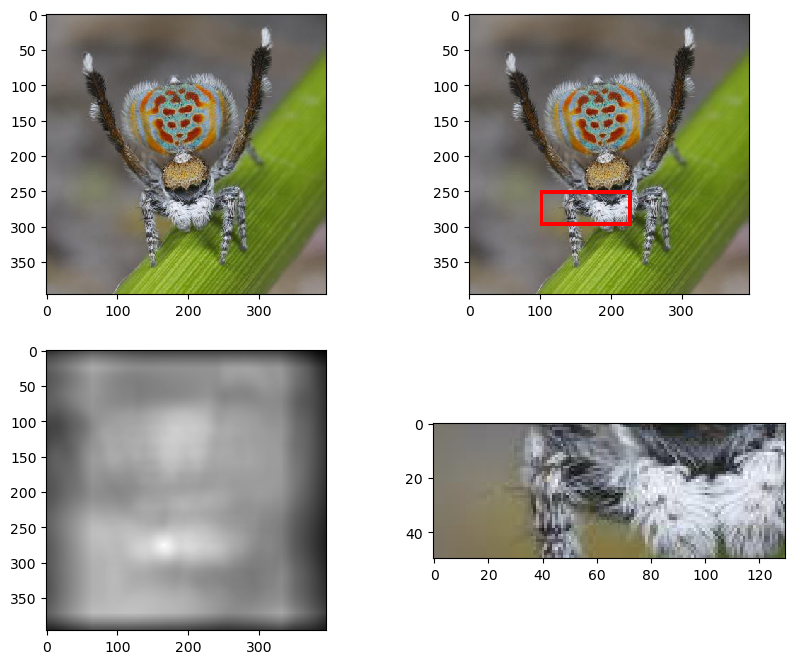

In [29]:
image = image2
crop_img = crop(image, 50, 100, 200, 130)
crop_img = crop(image, 250, 100, 50, 130)
image_corr = corr(image, crop_img)
image_corr = image_corr/ np.amax(image_corr)
display_corr(image, crop_img, image_corr, 1)

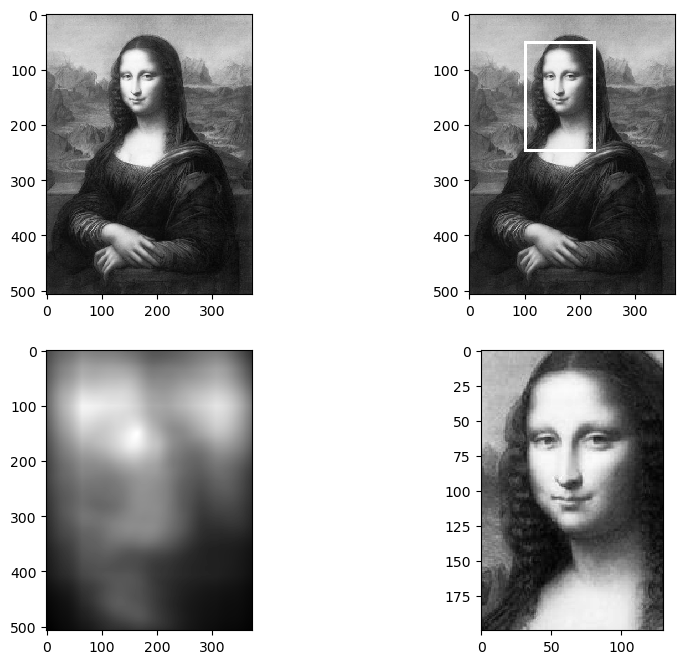

In [30]:
image = image3
crop_img = crop(image, 50, 100, 200, 130)
image_corr = corr(image, crop_img)
image_corr = image_corr/ np.amax(image_corr)
display_corr(image, crop_img, image_corr, 1)

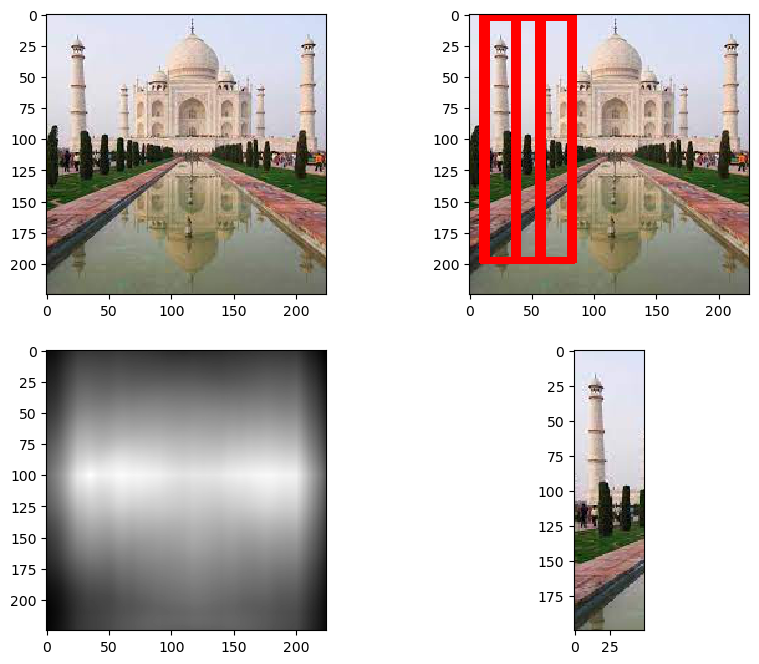

In [32]:
image_tm = load('images/Taj-Mahal.jpg')  
image = image_tm
crop_img = crop(image, 0, 10, 200, 50)
image_corr = corr(image, crop_img)
image_corr = image_corr/ np.amax(image_corr)
display_corr(image, crop_img, image_corr, 0.98)

<font size="5"> <b> Conclusion task 5</b></font> 

We can see on the image of the spider and the mona Lisa that the maximum similarity is for the pixel in the center of the patch. Therefore, the autocorrelation allows to identify a patch in an image.
Moreover, by taking a symmetrical image, we see that the correlation image is symmetrical. Thus, we can identify all the elements corresponding to the image of the patch.